<a href="https://colab.research.google.com/github/HadilGhaith/Prediction-of-Product-Sales/blob/main/project_part_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
"""UNIVARIATE PLOTTING FUNCTIONS FOR EDA"""
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


# TO DO: add the new print statements from explore_categorical
def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='Item_Outlet_Sales',
                           figsize=(6,4)):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
path = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/project 1-part 2.ipynb'
df = pd.read_csv(path)
df.head()

Unnamed: 0 Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           0           FDA15         9.30          Low Fat         0.016047   
1           1           DRC01         5.92          Regular         0.019278   
2           2           FDN15        17.50          Low Fat         0.016760   
3           3           FDX07        19.20          Regular         0.000000   
4           4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [5]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [6]:
df['Outlet_Size'].isna().sum()

2410

In [7]:
df['Item_Weight'].isna().sum()

1463

In [8]:
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

### Data Dictionary
- Variable Name	and Description
- Item_Identifier:  	Product ID
- Item_Weight:   	Weight of product
- Item_Fat_Content:	Whether the product is - low-fat or regular
- Item_Visibility: 	The percentage of total
 display area of all products in a - - - store allocated to the particular product
- Item_Type:	The category to which the product belongs
- Item_MRP:	Maximum Retail Price (list price) of the product
- Outlet_Identifier:  	Store ID
- Outlet_Establishment_Year:	The year in which store was established
- Outlet_Size:	The size of the store in terms of ground area covered
- Outlet_Location_Type:	The type of area in which the store is located
- Outlet_Type:	Whether the outlet is a grocery store or some sort of supermarket
- Item_Outlet_Sales:	Sales of the product in the particular store. This is the - - target variable to be predicted.

### Example: {Item_Identifier}

- Item_Identifier: Product ID.
  - Category defintions (if categorical)
  

In [9]:
# # Confirming the dtype to select correct EDA function
feature = "Item_Identifier"
df[feature].dtype

dtype('O')

<ipython-input-1-2023cc8c9696>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


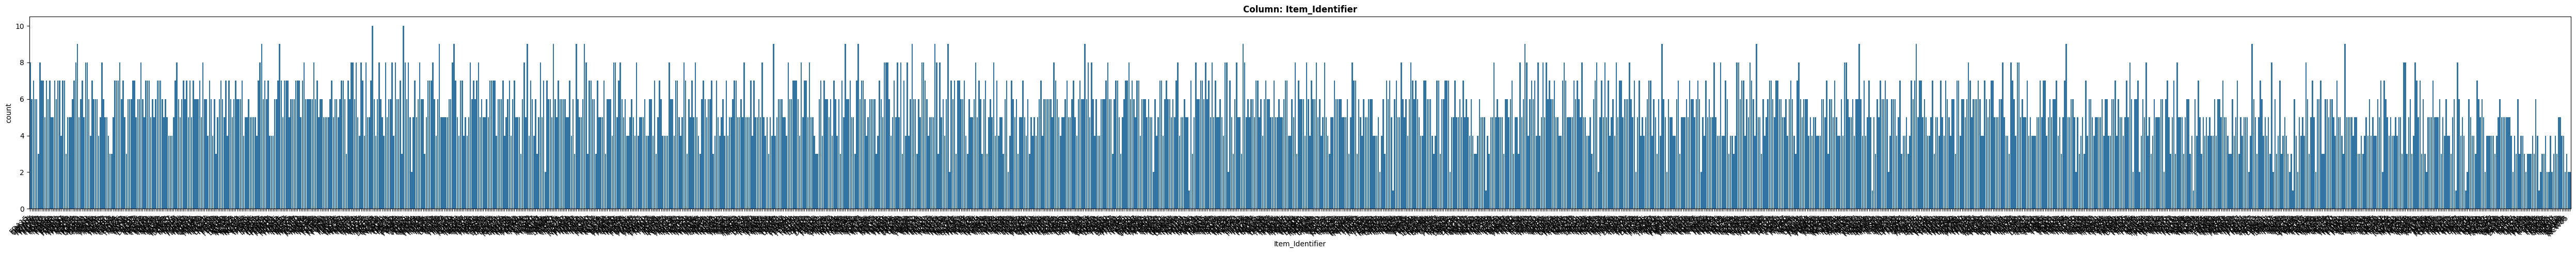

In [10]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature, figsize=(50,5));

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categroical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - no null

3. Is the feature constant or quasi-constant?
  - its not

4. What is the cardinality? Is it high?
  - uniq= 1559, its high cardinality

5. Would we know this BEFORE the target is determined?
  - yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - yes



- NaN's Found: 0 (0.0%)
- Unique Values: 1559
- Most common value: 'FDW13' occurs 10 times (0.12%)
- Not constant or quasi-constant.


<ipython-input-1-2023cc8c9696>:143: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


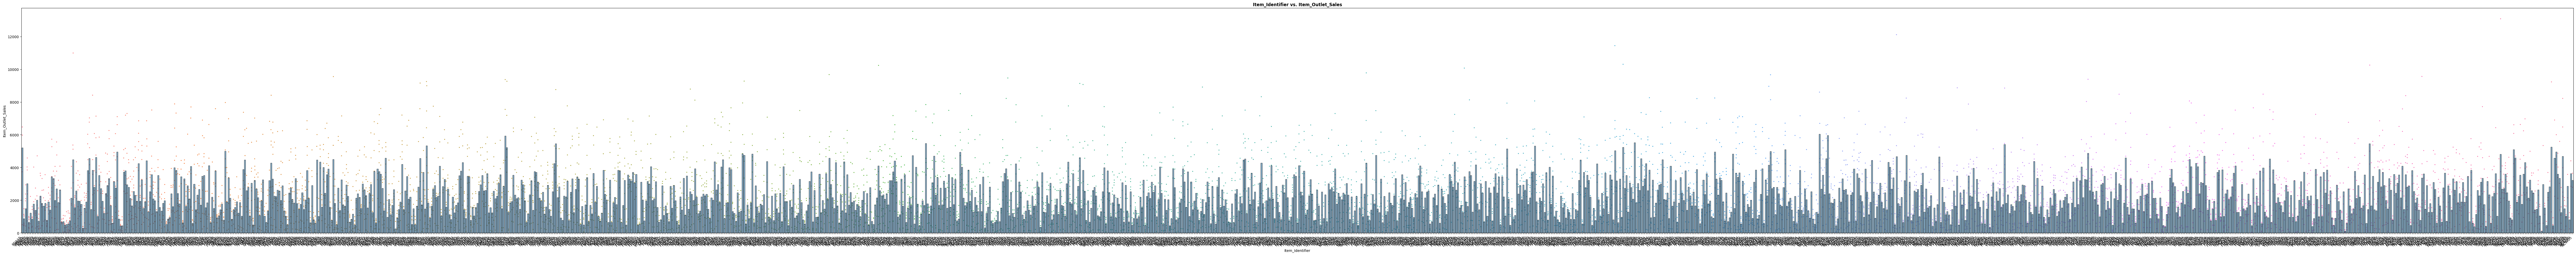

In [11]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature, figsize=(100,10));

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - no ?
  - Does this feature appear to be a predictor of the target?
    - no  ?

___

### Example: {Item_Weight}

- Item_Weight: Weight of product dictionary.
  - Category defintions (if categorical)
  

In [12]:
# # Confirming the dtype to select correct EDA function
feature = "Item_Weight"
df[feature].dtype

dtype('float64')

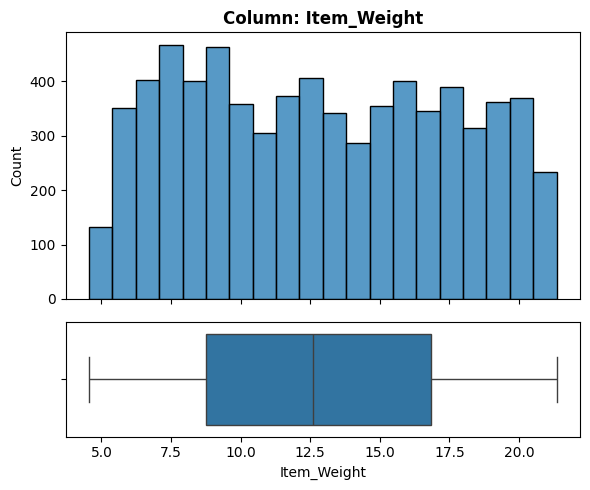

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Item_Weight'}, xlabel='Item_Weight', ylabel='Count'>,
        <Axes: xlabel='Item_Weight'>], dtype=object))

In [13]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df, feature)

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - yes (1463), with percentage of (17.17%)

3. Is the feature constant or quasi-constant?
  - its not

4. What is the cardinality? Is it high?
  - its not a categrooical

5. Would we know this BEFORE the target is determined?
  - yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - yes, cus its distrubeation close to be simatric



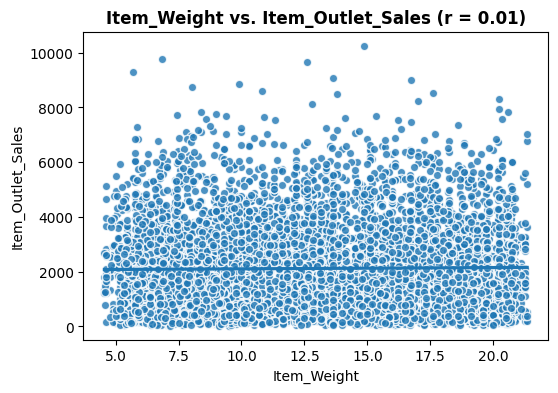

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Weight vs. Item_Outlet_Sales (r = 0.01)'}, xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>)

In [14]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df, feature)

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - no
  - Does this feature appear to be a predictor of the target?
    - no stromg corr between item weight and the target

___

#

### Example: {Item_Fat_Content}

- Item_Fat_Content: Whether the product is low-fat or regular.
  - Category defintions (if categorical)
  

In [15]:
# # Confirming the dtype to select correct EDA function
feature = "Item_Fat_Content"
df[feature].dtype

dtype('O')

<ipython-input-1-2023cc8c9696>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


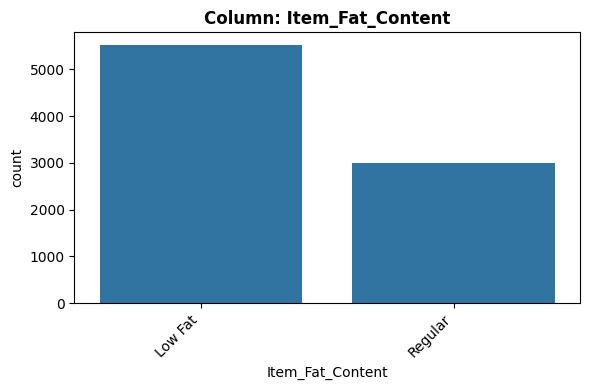

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Item_Fat_Content'}, xlabel='Item_Fat_Content', ylabel='count'>)

In [16]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature)

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - there is no null

3. Is the feature constant or quasi-constant?
  - its not

4. What is the cardinality? Is it high?
  - no , only 2 uniq values

5. Would we know this BEFORE the target is determined?
  -  yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - no, its effect the sales



<ipython-input-1-2023cc8c9696>:143: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


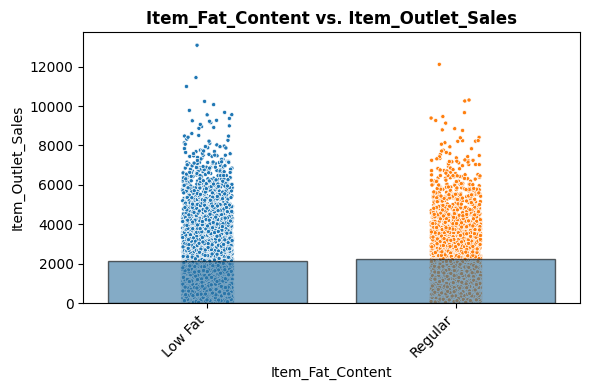

In [17]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - yes
  - Does this feature appear to be a predictor of the target?
    - not too much , its seems like close to eah other in sales

___

### Example: {Item_Visibility}

- Item_Visibility: The percentage of total display area of all products in a store allocated to the particular product.
  - Category defintions (if categorical)
  

In [18]:
# # Confirming the dtype to select correct EDA function
feature = "Item_Visibility"
df[feature].dtype

dtype('float64')

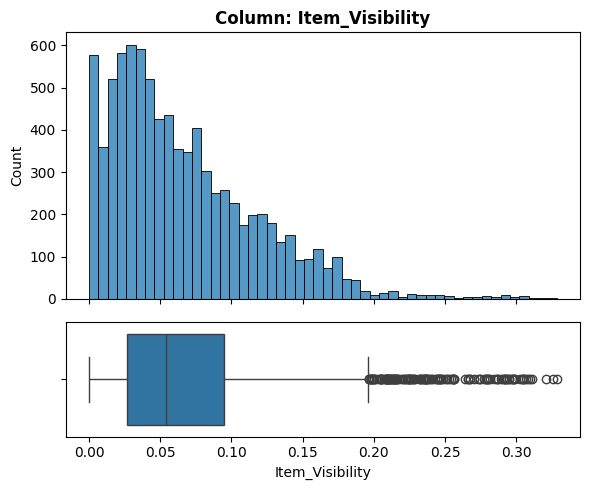

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Item_Visibility'}, xlabel='Item_Visibility', ylabel='Count'>,
        <Axes: xlabel='Item_Visibility'>], dtype=object))

In [19]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df, feature)

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - no null

3. Is the feature constant or quasi-constant?
  - its not

4. What is the cardinality? Is it high?
  - numerica there is no cardinality

5. Would we know this BEFORE the target is determined?
  - no

6. Is there a business case/understanding reason to exclude based on our business case?
  - no ,



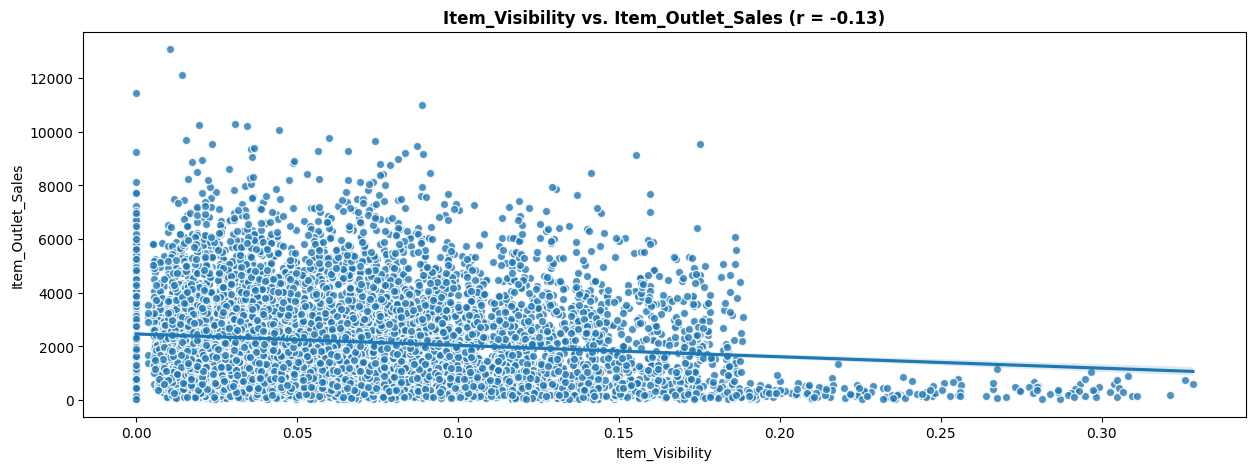

(<Figure size 1500x500 with 1 Axes>,
 <Axes: title={'center': 'Item_Visibility vs. Item_Outlet_Sales (r = -0.13)'}, xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>)

In [20]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df, feature, figsize=(15,5))

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - yes but slightly
  - Does this feature appear to be a predictor of the target?
    - there is a slightly negative corr, but the product with visibility between 0.2-0.3 have less sales and intisity than othere

___

### Example: {Item_Type}

- Item_Type: The category to which the product belongs.
  - Category defintions (if categorical)
  

In [21]:
# # Confirming the dtype to select correct EDA function
feature = "Item_Type"
df[feature].dtype

dtype('O')

<ipython-input-1-2023cc8c9696>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


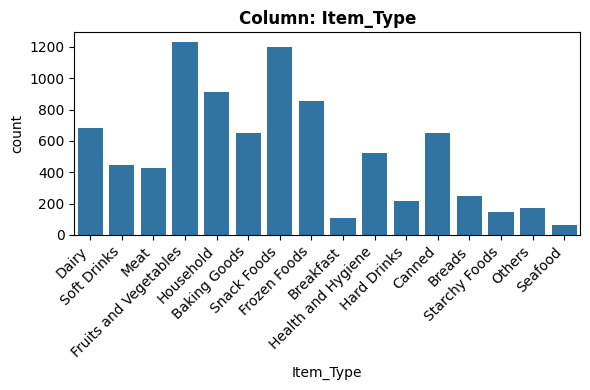

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Item_Type'}, xlabel='Item_Type', ylabel='count'>)

In [22]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature)

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - no

3. Is the feature constant or quasi-constant?
  - .its not

4. What is the cardinality? Is it high?
  - yes uniq value more than ten

5. Would we know this BEFORE the target is determined?
  - yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - no



<ipython-input-1-2023cc8c9696>:143: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


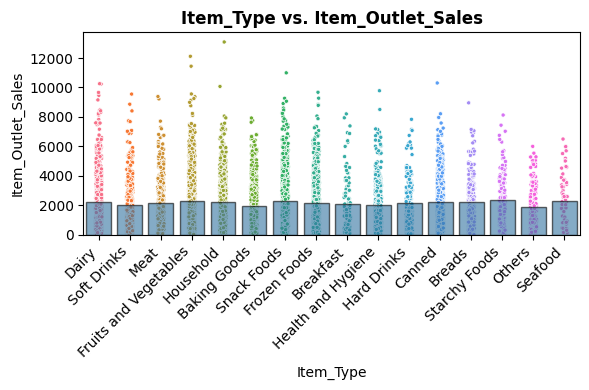

In [23]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - still not too much all of types had a avarage arounf 2000, but some of them recoreded a very high sales like household and fruits and vegetabels.
  - Does this feature appear to be a predictor of the target?
    - slightly we need to check more

___

### Example: {tem_MRP}

- tem_MRP: Maximum Retail Price (list price) of the product.
  - Category defintions (if categorical)
  

In [24]:
# # Confirming the dtype to select correct EDA function
feature = "Item_MRP"
df[feature].dtype

dtype('float64')

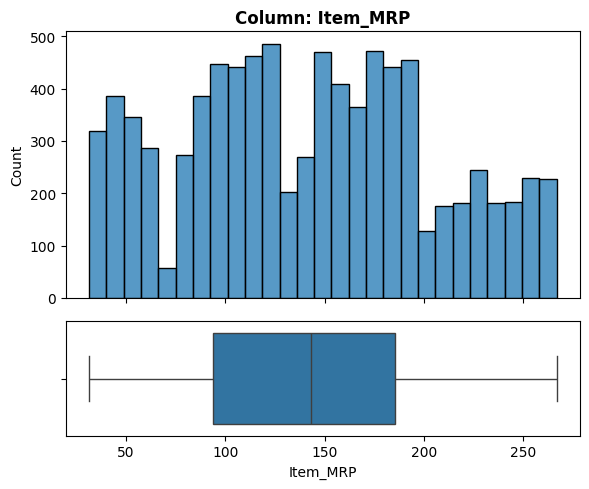

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Item_MRP'}, xlabel='Item_MRP', ylabel='Count'>,
        <Axes: xlabel='Item_MRP'>], dtype=object))

In [25]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df, feature)

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - there is no nulls

3. Is the feature constant or quasi-constant?
  - its not

4. What is the cardinality? Is it high?
  - numeric

5. Would we know this BEFORE the target is determined?
  - no

6. Is there a business case/understanding reason to exclude based on our business case?
  - there is no



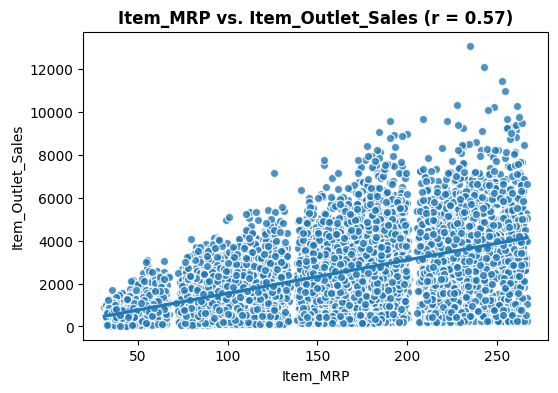

In [26]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - yes it is
  - Does this feature appear to be a predictor of the target?
    - there is a corr betweem the item MRP and sales but if we think like any thing with highe retail price should be sold  in higher price so the sales money in case the number in target colum refer the sales in currency

___

### Example: {Outlet_Identifier}

- Outlet_Identifier:Store ID.
  - Category defintions (if categorical)
  

In [27]:
# # Confirming the dtype to select correct EDA function
feature = "Outlet_Identifier"
df[feature].dtype

dtype('O')

<ipython-input-1-2023cc8c9696>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


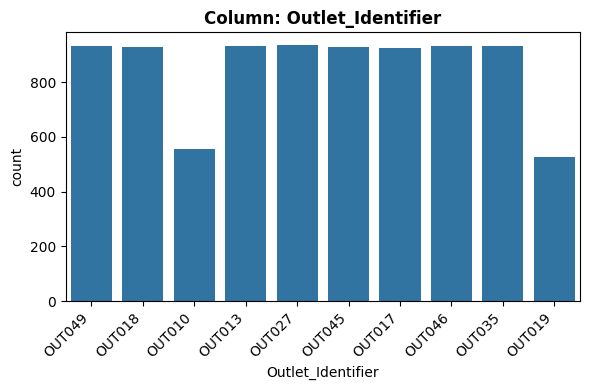

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [28]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - no nulls

3. Is the feature constant or quasi-constant?
  - its not

4. What is the cardinality? Is it high?
  - it is exactly 10 so it is colser to high cardinality

5. Would we know this BEFORE the target is determined?
  - yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - no cus the prediction is the sales of the outlit



<ipython-input-1-2023cc8c9696>:143: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


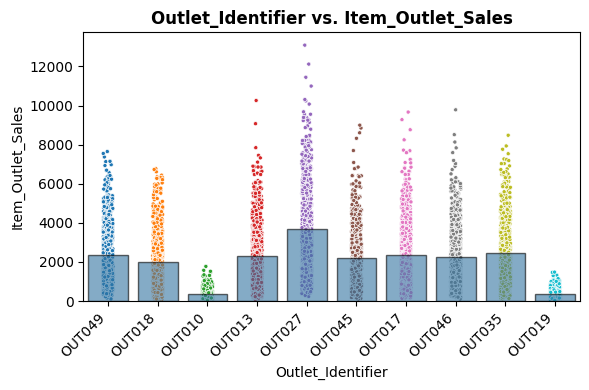

In [29]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - yes the out027 had the higher sales also there is varity in sales and the out 010 ,and out019 seems to be smaller stores so their sales are less
  - Does this feature appear to be a predictor of the target?
    - yes it is

___

#

### Example: {Outlet_Establishment_Year}

- Outlet_Establishment_Year : The year in which store was established.
  - Category defintions (if categorical)
  

In [30]:
# # Confirming the dtype to select correct EDA function
feature = "Outlet_Establishment_Year"
df[feature].dtype

dtype('int64')

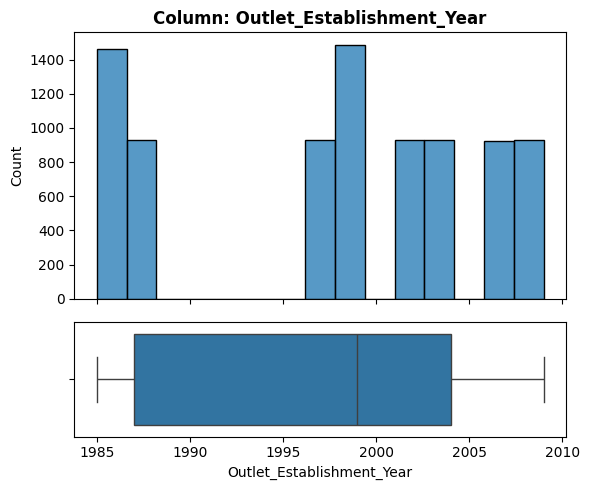

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [31]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - no nulls

3. Is the feature constant or quasi-constant?
  - not

4. What is the cardinality? Is it high?
  - numeric ,no cardinality for numeric features

5. Would we know this BEFORE the target is determined?
  - yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - no



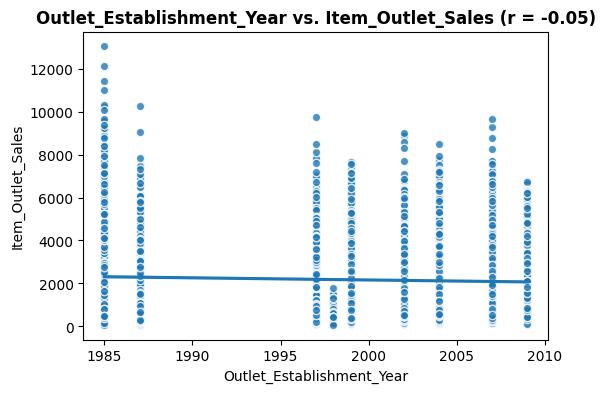

In [32]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - no relations with target
  - Does this feature appear to be a predictor of the target?
    - no relation

___

### Example: {Outlet_Size}

- Outlet_Sized: The size of the store in terms of ground area covered.
  - Category defintions (if categorical)
  

In [33]:
# # Confirming the dtype to select correct EDA function
feature = "Outlet_Size"
df[feature].dtype

dtype('O')

<ipython-input-1-2023cc8c9696>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


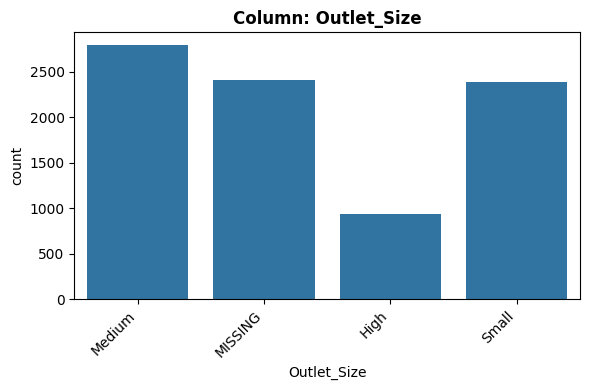

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [34]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 2410 with (28.28%) but can be look cus the size of the outlit doesnot change so in case we foound one entery for with the size can we fill it for every same outlit

3. Is the feature constant or quasi-constant?
  - its not

4. What is the cardinality? Is it high?
  - there is 4 unique value which is low cardinality

5. Would we know this BEFORE the target is determined?
  - yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - no



<ipython-input-1-2023cc8c9696>:143: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Size vs. Item_Outlet_Sales'}, xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>)

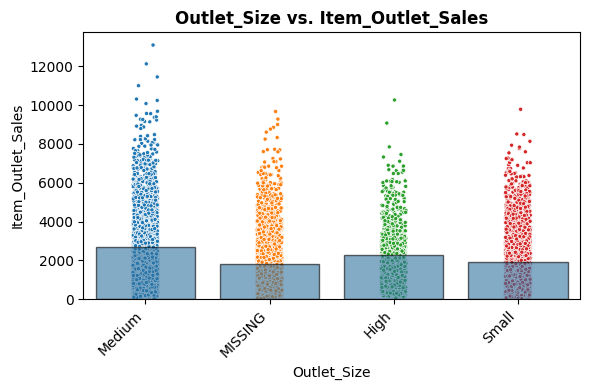

In [41]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, "Outlet_Size")

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - meddium size of outlit have higher avarge and higher values of sales so it could affect on the sales.
  - Does this feature appear to be a predictor of the target?
    - yes but knowing the the missing values will only be one of the three other value so knowing them will lead for a clear image.

___

### Example: {Outlet_Location_Type}

- Outlet_Location_Type:The type of area in which the store is located.
  - Category defintions (if categorical)
  

In [42]:
# # Confirming the dtype to select correct EDA function
feature = "Outlet_Location_Type"
df[feature].dtype

dtype('O')

<ipython-input-1-2023cc8c9696>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


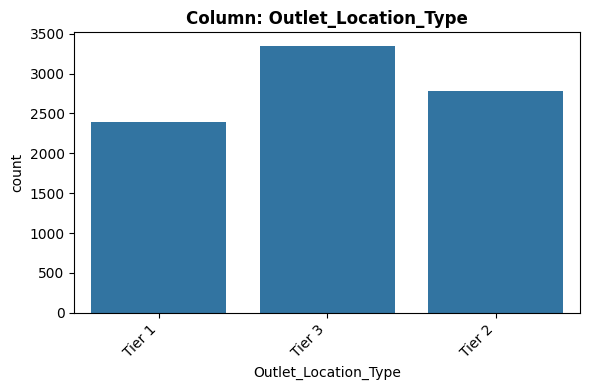

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [43]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - zero

3. Is the feature constant or quasi-constant?
  - its not

4. What is the cardinality? Is it high?
  - no there is only three unique values

5. Would we know this BEFORE the target is determined?
  - ...yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - no



<ipython-input-1-2023cc8c9696>:143: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Location_Type vs. Item_Outlet_Sales'}, xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>)

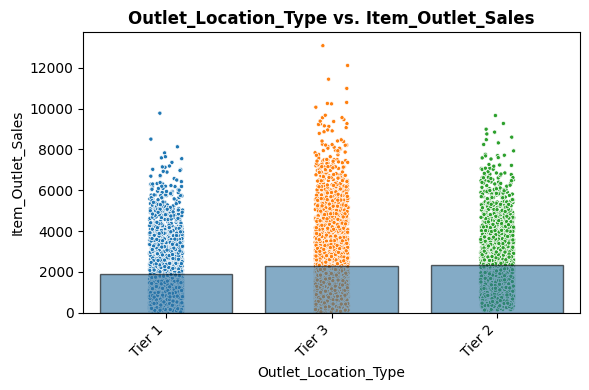

In [44]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature)

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - `the avarge is close to eachother, but the outlit that locate in tire 3have higher sales
  - Does this feature appear to be a predictor of the target?
    - maybe if i comper it with other feacher like outlit size

___

### Example: {Outlet_Type}

- Outlet_Type: Whether the outlet is a grocery store or some sort of supermarket.
  - Category defintions (if categorical)
  

In [45]:
# # Confirming the dtype to select correct EDA function
feature = "Outlet_Type"
df[feature].dtype

dtype('O')

<ipython-input-1-2023cc8c9696>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


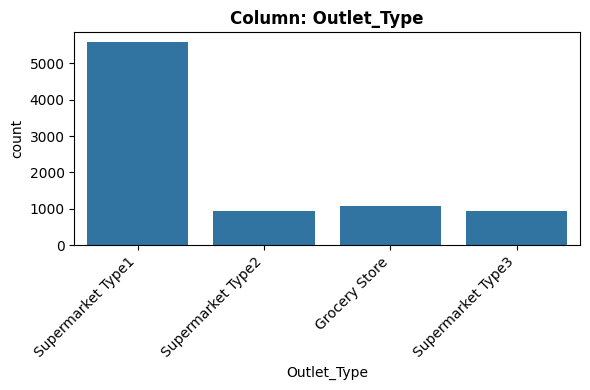

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Outlet_Type'}, xlabel='Outlet_Type', ylabel='count'>)

In [46]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature)

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - zero

3. Is the feature constant or quasi-constant?
  - its not

4. What is the cardinality? Is it high?
  - not high

5. Would we know this BEFORE the target is determined?
  - yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - no



<ipython-input-1-2023cc8c9696>:143: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Outlet_Type vs. Item_Outlet_Sales'}, xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>)

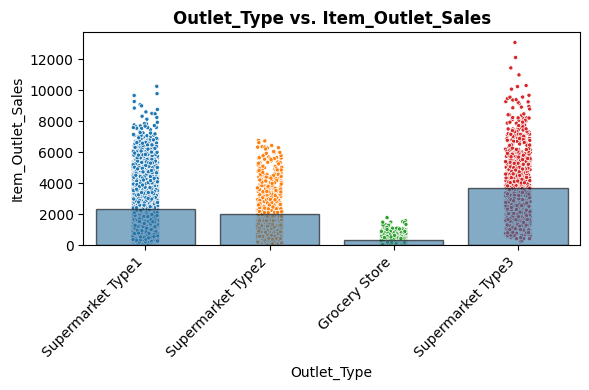

In [47]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature)

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - as we see the supermarket type three has the highe avarge and also higer sales , even that supermarket type one have mush more item seal in it for grocery store its normal cus i think its much smaleer than other so less item less sales
  - Does this feature appear to be a predictor of the target?
    - yes it is

___

In [48]:
fpath = '/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week04/project 1-part 4.ipynb'
df.to_csv(fpath)